# Минипроект № 1 курса "Аналитик данных" школы karpov.courses
Задачи:
1. Импортируйте библиотеку pandas как pd. Загрузите датасет bookings.csv с разделителем ;. Проверьте размер таблицы, типы переменных, а затем выведите первые 7 строк, чтобы посмотреть на данные. 
2. Приведите названия колонок к нижнему регистру и замените пробелы на знак нижнего подчеркивания.
3. Пользователи из каких стран совершили наибольшее число успешных бронирований? Укажите топ-5.
4. На сколько ночей в среднем бронируют отели разных типов?
5. Иногда тип номера, полученного клиентом (assigned_room_type), отличается от изначально забронированного (reserved_room_type). Такое может произойти, например, по причине овербукинга. Сколько подобных наблюдений встретилось в датасете?
6. Проанализируйте даты запланированного прибытия.
- На какой месяц чаще всего успешно оформляли бронь в 2016? Изменился ли самый популярный месяц в 2017?
- Сгруппируйте данные по годам и проверьте, на какой месяц бронирования отеля типа City Hotel отменялись чаще всего в каждый из периодов.
7. Посмотрите на числовые характеристики трёх переменных: adults, children и babies. Какая из них имеет наибольшее среднее значение?
8. Создайте колонку total_kids, объединив children и babies. Отели какого типа в среднем пользуются большей популярностью у клиентов с детьми?
9. Создайте переменную has_kids, которая принимает значение True, если клиент при бронировании указал хотя бы одного ребенка (total_kids), и False – в противном случае. Посчитайте отношение количества ушедших пользователей к общему количеству клиентов, выраженное в процентах (churn rate). Укажите, среди какой группы показатель выше.

# Описание данных:

Имеются следующие переменные:

Hotel – тип отеля (City Hotel или Resort Hotel)  
Is canceled – бронирование было отменено (1) или нет (0); неотменённое считается успешным
Lead time – количество дней, прошедших между датой бронирования и датой прибытия  
Arrival full date – полная дата прибытия
Arrival date year – год прибытия  
Arrival date month – месяц прибытия  
Arrival date week number – номер недели прибытия
Arrival date day of month – день прибытия
Stays in weekend nights – количество выходных (суббота или воскресенье), которые гость забронировал для проживания в отеле
Stays in week nights – количество дней (с понедельника по пятницу), которые гость забронировал для проживания в отеле
Stays total nights – общее число забронированных ночей (сумма двух предыдущих колонок)
Adults – число взрослых
Children – число детей
Babies – число младенцев 
Meal – выбранный тип питания
Country – страна происхождения клиента
Reserved room type – тип зарезервированного номера
Assigned room type – тип полученного номера (может отличаться от забронированного)
Customer type – тип бронирования
Reservation status – значение последнего статуса брони: Canceled – было отменено клиентом; Check-Out – клиент зарегистрировался, но уже покинул отель; No-Show – клиент не зарегистрировался и сообщил администрации отеля причину
Reservation status date – дата обновления статуса

# Инструкции

1. Импортируйте библиотеку pandas как pd. Загрузите датасет bookings.csv с разделителем ;. Проверьте размер таблицы, типы переменных, а затем выведите первые 7 строк, чтобы посмотреть на данные.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [2]:
bookings = pd.read_csv('https://stepik.org/media/attachments/lesson/360344/bookings.csv', sep=';')

In [3]:
bookings_head = bookings.head(7)

In [4]:
bookings.shape

(119390, 21)

In [5]:
bookings.dtypes

Hotel                         object
Is Canceled                    int64
Lead Time                      int64
arrival full date             object
Arrival Date Year              int64
Arrival Date Month            object
Arrival Date Week Number       int64
Arrival Date Day of Month      int64
Stays in Weekend nights        int64
Stays in week nights           int64
stays total nights             int64
Adults                         int64
Children                     float64
Babies                         int64
Meal                          object
Country                       object
Reserved Room Type            object
Assigned room type            object
customer type                 object
Reservation Status            object
Reservation status_date       object
dtype: object

In [6]:
bookings.head(7)

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-03


2. Приведите названия колонок к нижнему регистру и замените пробелы на знак нижнего подчеркивания.

In [7]:
bookings.columns=bookings.columns.str.lower()

In [8]:
bookings.columns=bookings.columns.str.replace(' ', '_')

In [9]:
bookings.head()

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


3. Пользователи из каких стран совершили наибольшее число успешных бронирований? Укажите топ-5.

In [10]:
is_canceled_by_country = bookings.groupby('country', as_index=False) \
        .agg({'is_canceled': 'sum'}) \
        .sort_values('is_canceled', ascending=False).head()


In [11]:
is_canceled_by_country

,country,is_canceled
135,PRT,27519
59,GBR,2453
51,ESP,2177
56,FRA,1934
81,ITA,1333


<AxesSubplot:xlabel='country', ylabel='is_canceled'>

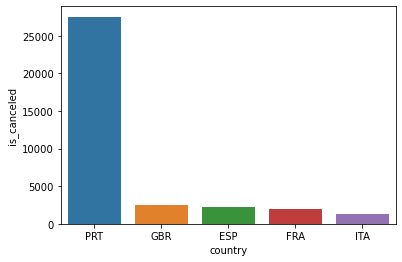

In [12]:
sns.barplot(data=is_canceled_by_country, x='country', y='is_canceled')

4. На сколько ночей в среднем бронируют отели разных типов?

In [13]:
bookings.groupby(['hotel'], as_index=False) \
        .agg({'stays_total_nights': 'mean'})

,hotel,stays_total_nights
0,City Hotel,2.978142
1,Resort Hotel,4.318547


5. Иногда тип номера, полученного клиентом (assigned_room_type), отличается от изначально забронированного (reserved_room_type). Такое может произойти, например, по причине овербукинга. Сколько подобных наблюдений встретилось в датасете?

In [14]:
bookings.query('reserved_room_type != assigned_room_type') \
        .agg({'reserved_room_type': 'count'})


reserved_room_type    14917
dtype: int64

6. Проанализируйте даты запланированного прибытия.
– На какой месяц чаще всего успешно оформляли бронь в 2016? Изменился ли самый популярный месяц в 2017?
– Сгруппируйте данные по годам и проверьте, на какой месяц бронирования отеля типа City Hotel отменялись чаще всего в каждый из периодов.

In [15]:
bookings.query('arrival_date_year != 2015') \
    .groupby(['arrival_date_year','arrival_date_month']) \
    .agg({'arrival_date_month': 'count'}) \
    .rename(columns={'arrival_date_month': 'count_of_cancel'}) \
    .sort_values(['arrival_date_year', 'count_of_cancel'], ascending=False)

count_of_cancel
arrival_date_year arrival_date_month                 
2017              May                            6313
                  April                          5661
                  June                           5647
                  July                           5313
                  March                          4970
                  August                         4925
                  February                       4177
                  January                        3681
2016              October                        6203
                  May                            5478
                  April                          5428
                  September                      5394
                  June                           5292
                  August                         5063
                  March                          4824
                  July                           4572
                  November                       4454
                  February                       3891
                  December                       3860
                  January                        2248

In [29]:
bookings.groupby(['arrival_date_year','arrival_date_month']) \
        .agg({'arrival_date_month': 'count'}) \
        .rename(columns={'arrival_date_month': 'count_of_cancel'}) \
        .sort_values(['arrival_date_year', 'count_of_cancel'], ascending=False)

count_of_cancel
arrival_date_year arrival_date_month                 
2017              May                            6313
                  April                          5661
                  June                           5647
                  July                           5313
                  March                          4970
                  August                         4925
                  February                       4177
                  January                        3681
2016              October                        6203
                  May                            5478
                  April                          5428
                  September                      5394
                  June                           5292
                  August                         5063
                  March                          4824
                  July                           4572
                  November                       4454
                  February                       3891
                  December                       3860
                  January                        2248
2015              September                      5114
                  October                        4957
                  August                         3889
                  December                       2920
                  July                           2776
                  November                       2340

7. Посмотрите на числовые характеристики трёх переменных: adults, children и babies. Какая из них имеет наибольшее среднее значение?

In [17]:
bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,3.427900,1.856403,0.103890,0.007949
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,2.557439,0.579261,0.398561,0.097436
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,4.000000,2.000000,0.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,69.000000,55.000000,10.000000,10.000000


In [18]:
bookings[['adults', 'children', 'babies']].mean()

adults      1.856403
children    0.103890
babies      0.007949
dtype: float64

8. Создайте колонку total_kids, объединив children и babies. Отели какого типа в среднем пользуются большей популярностью у клиентов с детьми?

In [19]:
bookings['total_kids'] = bookings['children'] + bookings['babies']

In [20]:
bookings.groupby('hotel', as_index=False).agg({'total_kids': 'mean'})

,hotel,total_kids
0,City Hotel,0.096311
1,Resort Hotel,0.142586


9. Создайте переменную has_kids, которая принимает значение True, если клиент при бронировании указал хотя бы одного ребенка (total_kids), и False – в противном случае. Посчитайте отношение количества ушедших пользователей к общему количеству клиентов, выраженное в процентах (churn rate). Укажите, среди какой группы показатель выше.

In [21]:
bookings['has_kids'] = bookings['total_kids'] != 0

In [22]:
bookings.head()

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,total_kids,has_kids
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01,0.0,False
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01,0.0,False
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02,0.0,False
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02,0.0,False
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03,0.0,False


In [23]:
count_cancel = bookings.groupby('has_kids',as_index=False) \
                       .agg({'is_canceled' : 'sum', 'hotel': 'count'}) \
                       .rename(columns={'hotel': 'number_of_cancel'})

In [24]:
count_cancel

,has_kids,is_canceled,number_of_cancel
0,False,40961,110054
1,True,3263,9336


In [38]:
count_cancel['church_rate'] = count_cancel['is_canceled'] / count_cancel['number_of_cancel']

In [39]:
count_cancel

,has_kids,is_canceled,number_of_cancel,church_rate
0,False,40961,110054,0.372190
1,True,3263,9336,0.349507


<AxesSubplot:xlabel='has_kids', ylabel='church_rate'>

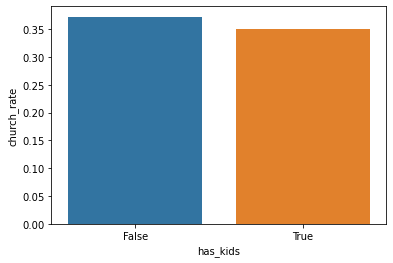

In [41]:
sns.barplot(data=count_cancel, x='has_kids', y='church_rate')

Churn rate (отток, коэффициент оттока) – это процент подписчиков (например, на push-уведомления от сайта), которые отписались от канала коммуникации, отказались от услуг сервиса в течение определенного периода времени. Иными словами, представляет собой отношение количества ушедших пользователей к общему количеству пользователей, выраженное в процентах.

В нашем случае Churn Rate - это процент клиентов, которые отменили бронирование. 

Согласно проведенному исследованию можно сделать вывод о том, что процент клиентов, которые отменили бронирование среди клиентов, у которых есть дети (37.22%), ниже, чем среди клиентов, у которых детей нет (34,95%) на нашей выборке данных.